# Importing

In [79]:
import pandas as pd
import csv
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [103]:
data = pd.read_csv("/Users/sonalichaudhari/Desktop/Churning/Data/WA_Fn-UseC_-Telco-Customer-Chur-Table 1.csv")

data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [104]:
t = data.dtypes.to_frame()
un = data.nunique().to_frame()
mv = data.isnull().sum().to_frame()
result = pd.concat([t, un, mv], axis=1 ,ignore_index=True).reset_index()
result.columns =['Feature','Datatype','No. of Uniques values','Missing values']
print("Number of columns: ",data.shape[1])
print("Number of rows   : ",data.shape[0])
data.head()
result

Number of columns:  21
Number of rows   :  7043


,Feature,Datatype,No. of Uniques values,Missing values
0,customerID,object,7043,0
1,gender,object,2,0
2,SeniorCitizen,int64,2,0
3,Partner,object,2,0
4,Dependents,object,2,0
5,tenure,int64,73,0
6,PhoneService,object,2,0
7,MultipleLines,object,3,0
8,InternetService,object,3,0
9,OnlineSecurity,object,3,0


# Data Cleaning

In [105]:
# Handling null values 
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)
#data.reset_index()[data.columns]
print("Missing values in column 'TotalCharges': ",data.TotalCharges.isnull().sum())

# Filtering the null value rows
data = data[data.TotalCharges.notnull()]

# Changing the datatype of column
data['TotalCharges'] = data['TotalCharges'].astype(float)

Missing values in column 'TotalCharges':  11


In [106]:
cols = ['MultipleLines','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
print("Uniques values in the columns to be replaced:\n")
for i in cols:
    print(i," : ",data[i].unique())
    
# Replacing "No internet service" and "No phone service" to 'No' for certain columns
cols = ['MultipleLines','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for c in cols:
    data[c] = data[c].replace('No internet service','No')
    data[c] = data[c].replace('No phone service','No')

Uniques values in the columns to be replaced:

MultipleLines  :  ['No phone service' 'No' 'Yes']
OnlineSecurity  :  ['No' 'Yes' 'No internet service']
DeviceProtection  :  ['No' 'Yes' 'No internet service']
TechSupport  :  ['No' 'Yes' 'No internet service']
StreamingTV  :  ['No' 'Yes' 'No internet service']
StreamingMovies  :  ['No' 'Yes' 'No internet service']


In [107]:
# Replacing the values
data['SeniorCitizen'] = data['SeniorCitizen'].replace(1,'Yes')
data['SeniorCitizen'] = data['SeniorCitizen'].replace(0,'No')

# Grouping the tenuere columnn values
def tenure(year) :
     if year <= 12 :
        return "Tenure(0-12)"
     elif (year > 12) & (year <= 24 ):
        return "Tenure(12-24)"
     elif (year > 24) & (year <= 48) :
        return "Tenure(24-48)"
     elif (year > 48) & (year <= 60) :
        return "Tenure(48-60)"
     elif year > 60 :
        return "Tenure_60+"

data['tenure_slot'] = data['tenure'].apply(lambda x: tenure(x))     

In [108]:
#data.to_csv('/Users/sonalichaudhari/Desktop/Churning/Data/Final_data.csv', index = False)

In [109]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_slot
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure(0-12)
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure(24-48)
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure(0-12)
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Tenure(24-48)
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure(0-12)


# Preprocessing

In [110]:
# Creating different lists for categorical columns and numerical columns

target = ['Churn']
id_col = ['customerID']
cols = data.columns

num_columns = data._get_numeric_data().columns
cat_columns = list(set(cols) - set(num_columns)-set())
cat_columns= [x for x in cat_columns if x not in target+id_col]


# Creating list of columns having 2 unique values

binary = data.nunique()[data.nunique()==2].keys().tolist()
non_binary =[x for x in cat_columns if x not in binary ]

In [111]:
print("Number of Categorical columns : ",len(cat_columns))
print("Number of Numerical columns :",len(num_columns))

Number of Categorical columns :  17
Number of Numerical columns : 3


In [112]:
# Encoding categorical data

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer

data = pd.get_dummies(data = data,columns = non_binary )

label_encoder = LabelEncoder()
for cat in binary:
    data[cat] = label_encoder.fit_transform(data[cat])
dd = data.copy()

sc = StandardScaler()
temp = pd.DataFrame(sc.fit_transform(data[num_columns]),columns=num_columns)
data = data.drop(columns=num_columns)
df = pd.concat([data, temp], axis=1, join_axes=[data.index])

In [32]:
# Separte the target column

train_cols = [x for x in df.columns if x not in target+id_col]

X = df[train_cols]
y = df['Churn']

# Feature Selection

## Univariate Selection

In [51]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

cols = [i for i in df.columns if i not in id_col + target ]

#dataframe with non negative values
X_2 = dd[cols]
y_2 = dd[target]

# negative_cols = ['MonthlyCharges', 'TotalCharges']
# X_2 = X[[x for x in X.columns if x not in negative_cols]].values
# y_2 = y.values

test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X_2, y_2)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X_2)
# Summarize selected features
print(features[0:16,:])

KeyError: "['PaymentMethod_Bank transfer (automatic)'\n 'PaymentMethod_Credit card (automatic)' 'PaymentMethod_Electronic check'\n 'PaymentMethod_Mailed check' 'InternetService_DSL'\n 'InternetService_Fiber optic' 'InternetService_No' 'tenure_Tenure(0-12)'\n 'tenure_Tenure(12-24)' 'tenure_Tenure(24-48)' 'tenure_Tenure(48-60)'\n 'tenure_Tenure_60+' 'Contract_Month-to-month' 'Contract_One year'\n 'Contract_Two year' 'OnlineBackup_No' 'OnlineBackup_No internet service'\n 'OnlineBackup_Yes'] not in index"

In [28]:
#Summerize scores
print ("scores")
print (fit.scores_)
print ("P - Values")
print (fit.pvalues_)

#create dataframe
score = pd.DataFrame({"features":cols,"scores":fit.scores_,"p_values":fit.pvalues_ })
score = score.sort_values(by = "scores" ,ascending =False)


#createing new label for categorical and numerical columns
score["feature_type"] = np.where(score["features"].isin(num_cols),"Numerical","Categorical")

#plot
trace  = go.Scatter(x = score[score["feature_type"] == "Categorical"]["features"],
                    y = score[score["feature_type"] == "Categorical"]["scores"],
                    name = "Categorial",mode = "lines+markers",
                    marker = dict(color = "red",
                                  line = dict(width =1))
                   )

trace1 = go.Bar(x = score[score["feature_type"] == "Numerical"]["features"],
                y = score[score["feature_type"] == "Numerical"]["scores"],name = "Numerical",
                marker = dict(color = "royalblue",
                              line = dict(width =1)),
                xaxis = "x2",yaxis = "y2"
               )
layout = go.Layout(dict(title = "Scores for Categorical & Numerical features",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     tickfont = dict(size =10),
                                     domain=[0, 0.7],
                                     tickangle = 90,zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "scores",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(b=200),
                        xaxis2=dict(domain=[0.8, 1],tickangle = 90,
                                    gridcolor = 'rgb(255, 255, 255)'),
                        yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                        )
                  )

data=[trace,trace1]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

scores
[  2.543e-01   1.335e+02   8.186e+01   1.313e+02   9.295e-02   6.515e+00
   1.472e+02   2.022e+01   1.354e+02   1.732e+01   1.593e+01   1.050e+02
   7.662e+01   9.997e+01   4.241e+02   4.473e+01   7.114e+01   3.721e+02
   2.855e+02   4.962e+02   2.386e+00   3.129e+01   6.300e+01   2.875e+02
   5.167e+02   1.766e+02   4.862e+02   2.825e+02   2.855e+02   3.121e+01]
P - Values
[  6.141e-001   7.090e-031   1.462e-019   2.160e-030   7.605e-001
   1.070e-002   7.220e-034   6.917e-006   2.646e-031   3.157e-005
   6.571e-005   1.234e-024   2.073e-018   1.545e-023   3.106e-094
   2.267e-011   3.332e-017   6.587e-083   4.814e-064   6.380e-110
   1.224e-001   2.218e-008   2.072e-015   1.742e-064   2.195e-114
   2.666e-040   9.454e-108   2.153e-063   4.814e-064   2.316e-008]


ValueError: arrays must all be same length

In [8]:
#Feature extraction
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() 
rfe = RFE(model, 15)

fit = rfe.fit(X_2, y_2)

print("Num Features: %d"% fit.n_features_) 
print("Selected Features: %s"% fit.support_) 
print("Feature Ranking: %s"% fit.ranking_)

Num Features: 15
Selected Features: [False False False False  True False  True False  True False  True  True
  True  True False  True  True False  True  True False False False  True
  True False  True False  True False]
Feature Ranking: [13  8 12 10  1  5  1 14  1  7  1  1  1  1 11  1  1  3  1  1 15  4  2  1  1
  6  1 16  1  9]


# Classification Models

In [9]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values,stratify= y,test_size = 0.3, random_state = 0)

# Feature Scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# SVM

In [16]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [17]:


# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.801895734597
Precision: 0.693766937669
Recall: 0.45632798574


In [18]:
from sklearn.svm import SVC
svc= SVC(kernel='rbf',gamma=0.01)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
metrics.accuracy_score(y_test,y_predict)

0.80000000000000004

In [19]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.798104265403


In [20]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.794312796209


In [21]:
from sklearn.model_selection import cross_val_score
gamma_range=[0.01,0.02,0.03,0.04,0.05]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.7940816949863001, 0.79152386594820812, 0.79223530728464941, 0.7937984128773603, 0.79593111583243159]


In [22]:
acc_score=[]
for c in list(range(1,15)):
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score) 

[0.79479192168336898, 0.79464967417270049, 0.7947919216833691, 0.7946496741727006, 0.7946496741727006, 0.7946496741727006, 0.7946496741727006, 0.79450762871815495, 0.7947919216833691, 0.7947919216833691, 0.7947919216833691, 0.7947919216833691, 0.7949341691940377, 0.7947919216833691]


In [23]:
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.79195060905587211, 0.79038669523866889, 0.76990971004128905, 0.7389082264082264, 0.73421506653414548]


#  Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.786255924171


In [11]:
clf=RandomForestClassifier(n_estimators=100, max_depth=7, random_state=0)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.803791469194


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 70, stop = 150, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 20, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid

parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
fti = clf.feature_importances_

model = SelectFromModel(clf, prefit=True)
X_train_new = model.transform(X_train)
pprint(parameters)

{'bootstrap': [True, False],
 'max_depth': [5, 8, 12, 16, 20, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [70, 78, 87, 96, 105, 114, 123, 132, 141, 150]}


In [27]:
clf = GridSearchCV(RandomForestClassifier(), parameters, cv = 5, n_jobs=-1)
clf.fit(X_train_new, y_train)

# print(clf.score(X_train_new, y_train))
# print(clf.best_params_)

# y_pred = clf.predict(X_test)

# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

KeyboardInterrupt: 

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [12]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [44]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [45]:
y_pred=rf_random.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.802843601896


In [43]:
import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

# get some data
digits = load_digits()
X, y = digits.data, digits.target

# build a classifier
clf = RandomForestClassifier(n_estimators=20)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

RandomizedSearchCV took 4.95 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.928 (std: 0.029)
Parameters: {'bootstrap': False, 'max_features': 5, 'criterion': 'gini', 'min_samples_split': 2, 'max_depth': None}

Model with rank: 2
Mean validation score: 0.927 (std: 0.026)
Parameters: {'bootstrap': False, 'max_features': 9, 'criterion': 'gini', 'min_samples_split': 3, 'max_depth': None}

Model with rank: 2
Mean validation score: 0.927 (std: 0.026)
Parameters: {'bootstrap': False, 'max_features': 7, 'criterion': 'gini', 'min_samples_split': 8, 'max_depth': None}

GridSearchCV took 17.68 seconds for 72 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.934 (std: 0.015)
Parameters: {'bootstrap': False, 'max_features': 10, 'criterion': 'entropy', 'min_samples_split': 3, 'max_depth': None}

Model with rank: 2
Mean validation score: 0.933 (std: 0.029)
Parameters: {'bootstrap': False, 'max_features': 10, 'criterion': 'gini', 'min_

In [1]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error


ImportError: No module named 'xgboost'

# Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.736492890995


# Logistic Regression 

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[[1406  143]
 [ 283  278]]
Accuracy: 0.798104265403
Precision: 0.660332541568
Recall: 0.495543672014


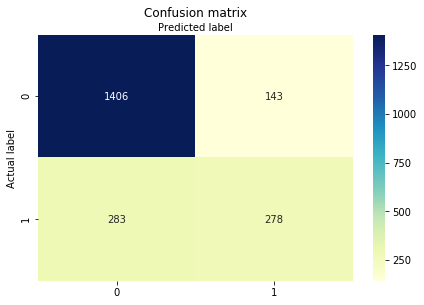

In [25]:
logreg  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[1406  143]
 [ 283  278]]
Accuracy: 0.798104265403
Precision: 0.660332541568
Recall: 0.495543672014


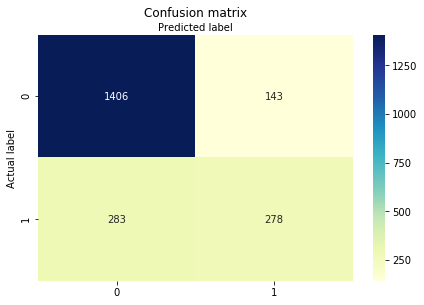

In [15]:
logreg  = LogisticRegression()

logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))